# Chapter 6 - Other Popular Machine Learning Methods
## Segment 6 - Ensemble methods with random forest

This is a classification problem, where in we will be estimating the species label for iris flowers.

In [1]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:
- sepal length (cm)
- sepal width (cm)  
- petal length (cm)  
- petal width (cm)
- species type

In [4]:
df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [5]:
print(y.labels.value_counts())

labels
0    50
1    50
2    50
Name: count, dtype: int64


# Preparing the data for training the model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=17)

# Build a Random Forest model

In [7]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

y_train_array = np.ravel(y_train)

classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

# Evaluating the model on the test data

In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [10]:
print(y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]


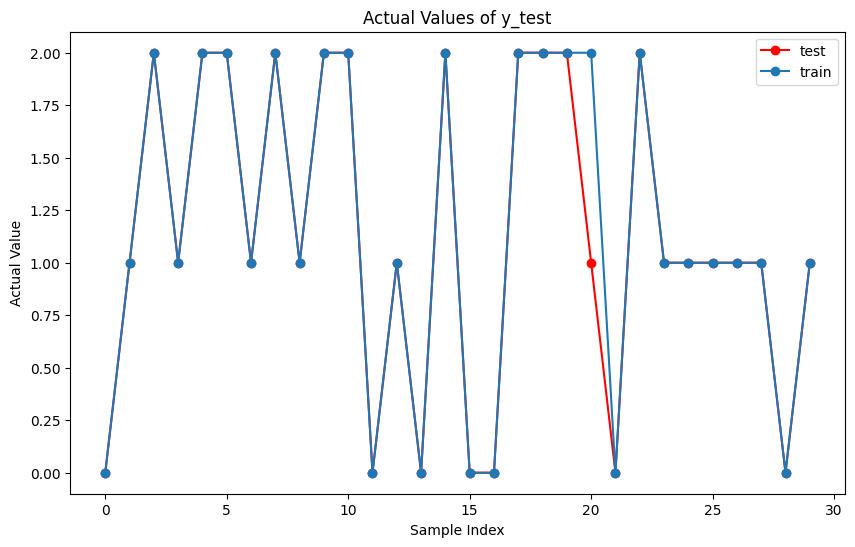

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_pred, marker='o', color='red', label='test')
plt.plot(y_test_array, marker='o', label='train')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.title('Actual Values of y_test')
plt.legend()
plt.show()